In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from geopy import geocoders
from geopy.geocoders import Nominatim
import math
import re
%matplotlib inline

df = pd.read_csv('IndiaAffectedWaterQualityAreasWithCoordinates.csv')
df.head()

,state,district,district_coordinates,block,panchayat,village,habitation,pollutant,year
0,ANDHRA PRADESH,EAST GODAVARI,"(17.32125, 82.0407137)",PRATHIPADU,GOKAVARAM,VANTHADA,VANTHADA,Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI,"(17.32125, 82.0407137)",PRATHIPADU,GOKAVARAM,PANDAVULAPALEM,PANDAVULAPALEM,Fluoride,2009
2,ANDHRA PRADESH,EAST GODAVARI,"(17.32125, 82.0407137)",PRATHIPADU,GAJJANAPUDI,G. KOTHURU,G. KOTHURU,Salinity,2009
3,ANDHRA PRADESH,EAST GODAVARI,"(17.32125, 82.0407137)",PRATHIPADU,GAJJANAPUDI,GAJJANAPUDI,GAJJANAPUDI,Salinity,2009
4,ANDHRA PRADESH,EAST GODAVARI,"(17.32125, 82.0407137)",PRATHIPADU,CHINTALURU,CHINTALURU,CHINTALURU,Salinity,2009


In [398]:
grp = df.groupby(['pollutant','district_coordinates']).size().unstack()
grp.fillna(0,inplace=True)

In [399]:
locations = []
for place in grp.columns:
    locations.append(tuple([float(i.strip()) for i in re.sub(r'[()]','',place).split(',')]))
pollutants = [[p] for p in grp.index]
for idx, p in enumerate(grp.index):
    d = {'values':_,'max':_,'min':_}
    d['values'] = list(grp.values[idx])
    d['max'] = max(grp.values[idx])
    d['min'] = min(grp.values[idx])
    pollutants[idx].append(d)

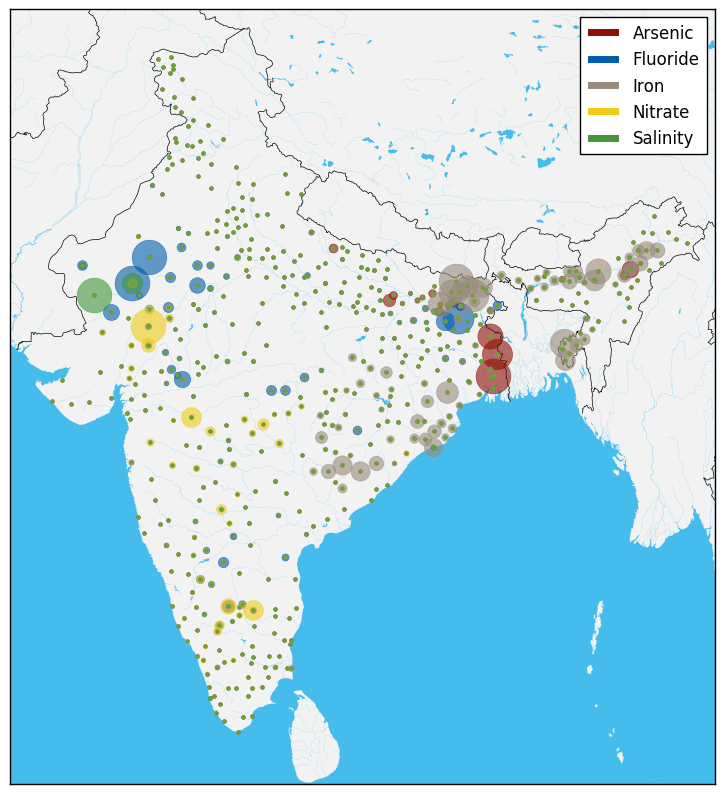

In [401]:
pcolors = ['#8b0f04','#005daa','#998b7d','#f0cc16','#439639']
m = Basemap(resolution='i', # c, l, i, h, f or None
            projection='merc',
            lat_0=22.35, lon_0=78.66,
            llcrnrlon=67.85, llcrnrlat= 5.88, urcrnrlon=97.82, urcrnrlat=36.17)
plt.figure(figsize=(10,10))

#m.bluemarble()
#parallels = np.arange(0.,90,5.)
#m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#meridians = np.arange(0.,360.,5.)
#m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(lake_color='#46bcec',color='#f2f2f2')
m.drawcountries()
m.drawrivers(linewidth=0.1, color='#46bcec')
#m.drawcoastlines()
max_pt = 50
min_pt = 5
for idx, p in enumerate(pollutants):
    for lidx, v in enumerate(p[1]['values']):
        x,y = m(locations[lidx][1],locations[lidx][0])
        m.plot(x,y,marker='.',color=pcolors[idx],markersize=v*(max_pt-min_pt)/p[1]['max']+min_pt,alpha=0.6)

legend=[]
for i in range(len(pollutants)):
    legend.append(plt.Line2D(range(10), range(10), linewidth=5, color=pcolors[i]))
plt.legend(tuple(legend),tuple([p[0] for p in pollutants]))

plt.show()